In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras import models, layers

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
imgs_path = "C:\Autonise_chat_bot\Traffic sign project\Train"
data_list = []
labels_list = []
classes_list = 43 # there are 43 sign-classes in total for detecting
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

In [6]:
data

array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 86,  87,  84],
         ...,
         [ 68,  75,  75],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 80,  80,  82],
         [ 90,  89,  84],
         ...,
         [ 73,  77,  78],
         [ 76,  78,  75],
         [ 80,  80,  78]],

        [[ 78,  78,  80],
         [ 86,  85,  86],
         [ 93,  90,  91],
         ...,
         [ 72,  74,  72],
         [ 73,  74,  69],
         [ 78,  78,  74]],

        ...,

        [[133, 134, 139],
         [122, 127, 132],
         [112, 121, 124],
         ...,
         [ 94,  94,  89],
         [ 97,  98,  91],
         [ 99, 103,  99]],

        [[ 91,  95,  99],
         [ 91,  98, 103],
         [ 74,  85,  89],
         ...,
         [103, 101,  95],
         [110, 113, 104],
         [ 96, 104,  98]],

        [[ 85,  84,  87],
         [ 95, 101, 107],
         [ 61,  74,  79],
         ...,
         [102, 102,  95],
        

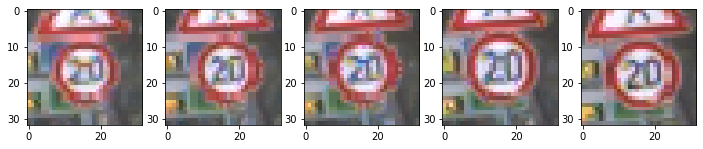

In [7]:
# Visualizing Dataset

plt.figure(figsize = (12,12))

for i in range(5) :
    plt.subplot(1, 5, i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

In [8]:
# preparing the data
from tensorflow.keras.utils import to_categorical
def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prep_dataset(data,labels)

In [9]:
# splitting for training and validating dataset

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5, shuffle=True)

In [10]:
# model creation 
# CNN

model = models.Sequential() #Sequential Model

#ConvLayer(32 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=X.shape[1:]))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(128 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#ConvLayer(512 filters) + Dropout + ConvLayer(512 filters) + MaxPooling + BatchNormalization
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())

#Flatten
model.add(layers.Flatten())

#2 Dense layers with 4000 hidden units
model.add(layers.Dense(4000,activation='relu'))
model.add(layers.Dense(4000,activation='relu'))

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(43,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0

In [11]:
# compiling and fitting of data

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history= model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_val,y_val))

Epoch 1/10
491/491 [==============================] - 615s 1s/step - loss: 1.5474 - accuracy: 0.5465 - val_loss: 0.4180 - val_accuracy: 0.8615
Epoch 2/10
491/491 [==============================] - 606s 1s/step - loss: 0.2719 - accuracy: 0.9107 - val_loss: 0.1865 - val_accuracy: 0.9500
Epoch 3/10
491/491 [==============================] - 608s 1s/step - loss: 0.1437 - accuracy: 0.9566 - val_loss: 0.0570 - val_accuracy: 0.9832
Epoch 4/10
491/491 [==============================] - 1236s 3s/step - loss: 0.1152 - accuracy: 0.9661 - val_loss: 0.0999 - val_accuracy: 0.9753
Epoch 5/10
491/491 [==============================] - 484s 986ms/step - loss: 0.1060 - accuracy: 0.9708 - val_loss: 0.0724 - val_accuracy: 0.9857
Epoch 6/10
491/491 [==============================] - 506s 1s/step - loss: 0.0891 - accuracy: 0.9754 - val_loss: 0.1049 - val_accuracy: 0.9776
Epoch 7/10
491/491 [==============================] - 520s 1s/step - loss: 0.0722 - accuracy: 0.9794 - val_loss: 0.0450 - val_accuracy: 0.

In [12]:
# prediction and evaluation 

y_test = np.argmax(y_test,axis=1)
y_pred= model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

123/123 [==============================] - 17s 131ms/step


In [13]:
print('- Train dataset Acuracy achieved: {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(y_test,y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

- Train dataset Acuracy achieved: 98.78%
-Accuracy by model was: 98.14%
-Accuracy by validation was: 98.75%


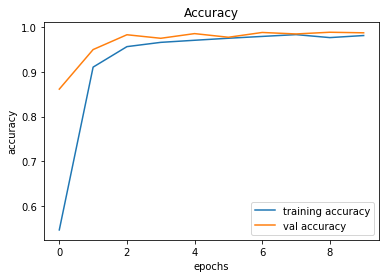

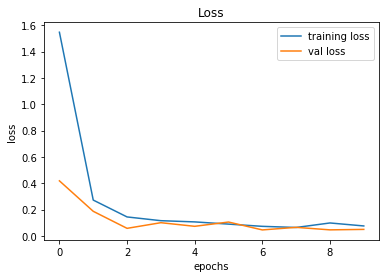

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
model.save("my_model.h5")

In [16]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
path='C:\Autonise_chat_bot\Traffic sign project'
for img in imgs:
    image = Image.open(path +'\\'+ img)
    image = image.resize((30,30))
    data.append(np.array(image))




In [17]:
model.save('traffic_classifier.h5')
